In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sqlite3
import pandas as pd
import sqlite3

import os
from dotenv import load_dotenv
from utils.get_or_create_combined_database import get_or_create_combined_database
load_dotenv(verbose=True, override=True)

database_folder = os.getenv("DATABASE_FOLDER")

RECALCULATE_ROLES = False

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
database_file = get_or_create_combined_database(database_folder)

table_name = "champs_cleaned"

conn = sqlite3.connect(database_file)
query = 'SELECT * FROM champs_cleaned LIMIT 10'
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the dataframe as an example
data.head()

Thumbs.db
combined2.db
Found 2 database files in the folder specified by DATABASE_FOLDER
Found combined database /u/23/tarpill1/unix/Documents/combined2.db


,game_id,time,name,hp,max_hp,mana,max_mana,armor,mr,ad,...,normalized_e_name,normalized_e_cd,normalized_r_name,normalized_r_cd,normalized_d_name,normalized_d_cd,normalized_f_name,normalized_f_cd,compound_key,role
0,2841236401,5.541945,Mordekaiser,645.0,645.0,0.0,100.0,61.0,32.0,61.0,...,1,-0.009084,1,-0.009084,1,0.020916,1,0.020916,2841236401_100_Mordekaiser,Top
1,2841236401,5.541945,Viego,630.0,630.0,10000.0,10000.0,46.0,32.0,62.4,...,2,-0.009084,2,-0.009084,1,0.020916,2,0.020916,2841236401_100_Viego,Jungle
2,2841236401,5.541945,Riven,745.0,745.0,0.0,0.0,33.0,32.0,84.8,...,3,-0.009084,3,-0.009084,1,0.020916,3,0.020916,2841236401_100_Riven,Mid
3,2841236401,5.541945,Ezreal,600.0,600.0,375.0,375.0,36.0,30.0,67.4,...,4,-0.009084,4,-0.009084,1,0.020916,4,0.020916,2841236401_100_Ezreal,Bot
4,2841236401,5.541945,Leblanc,598.0,598.0,400.0,400.0,34.0,30.0,55.0,...,5,-0.009084,5,-0.009084,1,0.020916,1,0.020916,2841236401_100_Leblanc,Bot


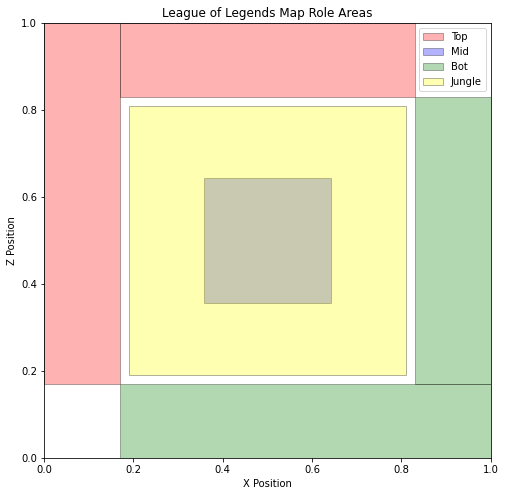

In [3]:
lane_width = 0.17
lw = lane_width
jungle_padding = 0.02
jp = jungle_padding
mid_multiplier = 2.1
mmulti = mid_multiplier


top_ranges = [[(0, lw), (lw, 1)], [(lw, 1-lw), (1-lw, 1)]]
mid_range = [(1 - mmulti * lw, 1 - mmulti * lw), (mmulti * lw, mmulti*lw,)]
bot_ranges = [[(lw, 0), (1, lw), ], [(1-lw, lw), (1, 1-lw), ]]
jungle_range = [(lw+jp, lw+jp), (1-lw-jp, 1-lw-jp)]

# Function to plot the role areas with dynamic ranges


def plot_dynamic_role_areas():
    fig, ax = plt.subplots(figsize=(8, 8))

    # Define the areas for each role with dynamic ranges
    for top_range in top_ranges:
        top_area = patches.Rectangle(top_range[0], top_range[1][0]-top_range[0][0], top_range[1][1]-top_range[0][1],
                                     facecolor='red', alpha=0.3, edgecolor='black', label='Top')
        ax.add_patch(top_area)

    mid_area = patches.Rectangle(mid_range[0], mid_range[1][0]-mid_range[0][0], mid_range[1][1]-mid_range[0][1],
                                 facecolor='blue', alpha=0.3, edgecolor='black', label='Mid')
    ax.add_patch(mid_area)

    for bot_range in bot_ranges:
        bot_area = patches.Rectangle(bot_range[0], bot_range[1][0]-bot_range[0][0], bot_range[1][1]-bot_range[0][1],
                                     facecolor='green', alpha=0.3, edgecolor='black', label='Bot')
        ax.add_patch(bot_area)

    jungle_area = patches.Rectangle(jungle_range[0], jungle_range[1][0]-jungle_range[0][0], jungle_range[1][1]-jungle_range[0][1],
                                    facecolor='yellow', alpha=0.3, edgecolor='black', label='Jungle')
    ax.add_patch(jungle_area)

    # Set plot limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Z Position')
    ax.set_title('League of Legends Map Role Areas')

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())

    # Show the plot
    # plt.gca().invert_xaxis()
    # plt.gca().invert_yaxis()
    plt.show()


plot_dynamic_role_areas()

In [4]:
# Use this if needed to inspect some specific games
# data_to_test = data[data['game_id'] == 4848459903]

# Plot positions of a single champion


def plot_champion_positions(data, champion_names):
    plt.figure(figsize=(8, 8))
    for champion_name in champion_names:
        champion_data = data[data['name'] ==
                             champion_name]
        plt.scatter(champion_data['normalized_pos_x'],
                    champion_data['normalized_pos_z'], alpha=0.5, label=champion_name)

    # Define the areas for each role with dynamic ranges
    for top_range in top_ranges:
        top_area = patches.Rectangle(top_range[0], top_range[1][0]-top_range[0][0], top_range[1][1]-top_range[0][1],
                                     facecolor='red', alpha=0.3, edgecolor='black', label='Top')
        plt.gca().add_patch(top_area)

    mid_area = patches.Rectangle(mid_range[0], mid_range[1][0]-mid_range[0][0], mid_range[1][1]-mid_range[0][1],
                                 facecolor='blue', alpha=0.3, edgecolor='black', label='Mid')
    plt.gca().add_patch(mid_area)

    for bot_range in bot_ranges:
        bot_area = patches.Rectangle(bot_range[0], bot_range[1][0]-bot_range[0][0], bot_range[1][1]-bot_range[0][1],
                                     facecolor='green', alpha=0.3, edgecolor='black', label='Bot')
        plt.gca().add_patch(bot_area)

    jungle_area = patches.Rectangle(jungle_range[0], jungle_range[1][0]-jungle_range[0][0], jungle_range[1][1]-jungle_range[0][1],
                                    facecolor='yellow', alpha=0.3, edgecolor='black', label='Jungle')
    plt.gca().add_patch(jungle_area)

    # Set plot limits and labels
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('X Position')
    plt.ylabel('Z Position')
    plt.title(f'Positions of Champions')
    plt.legend()
    plt.show()


# Example usage with a single champion
# champion_names = data_to_test['name'].unique()
# # Replace 'Irelia' with the actual champion name in your dataset
# plot_champion_positions(data_to_test, champion_names)
# data_to_test.head()

In [5]:
# Function to assign roles to each player with dynamic ranges

def is_within_range(player_data, range_):
    x_min, x_max = sorted([range_[0][0], range_[1][0]])
    z_min, z_max = sorted([range_[0][1], range_[1][1]])
    return np.sum((player_data['normalized_pos_x'] > x_min) &
                  (player_data['normalized_pos_x'] < x_max) &
                  (player_data['normalized_pos_z'] > z_min) &
                  (player_data['normalized_pos_z'] < z_max))


def assign_roles_single_game(data):
    roles = {}
    teams = data['team'].unique()

    for team in teams:
        team_data = data[data['team'] == team]
        players = team_data['compound_key'].unique()

        # Calculate metrics to infer roles
        time_in_jungle = {}
        time_in_mid = {}
        time_in_bot = {}
        time_in_top = {}

        for player in players:
            player_data = team_data[team_data['compound_key'] == player]
            time_in_jungle[player] = is_within_range(
                player_data, jungle_range) - is_within_range(player_data, mid_range)
            time_in_mid[player] = is_within_range(player_data, mid_range)
            time_in_bot[player] = sum(is_within_range(
                player_data, bot_range) for bot_range in bot_ranges)
            time_in_top[player] = sum(is_within_range(
                player_data, top_range) for top_range in top_ranges)

        # Identify the jungler
        jungler = max(time_in_jungle, key=time_in_jungle.get)
        roles[jungler] = 'Jungle'
        players = [p for p in players if p != jungler]

        # Identify the mid
        mid = max(time_in_mid, key=time_in_mid.get)
        roles[mid] = 'Mid'
        players = [p for p in players if p != mid]

        # Identify the bot roles
        bot1, bot2 = sorted(
            players, key=lambda p: time_in_bot[p], reverse=True)[:2]
        roles[bot1] = 'Bot'
        roles[bot2] = 'Bot'
        players = [p for p in players if p not in [bot1, bot2]]

        # The remaining player is the top
        roles[players[0]] = 'Top'

    return roles

In [6]:
if RECALCULATE_ROLES:
    # Load the data in batches
    conn = sqlite3.connect(database_file)
    cursor = conn.cursor()

    batch_size = 100000
    offset = 0

    # Get the column names from the table
    cursor.execute(f"PRAGMA table_info({table_name})")
    description = cursor.fetchall()
    
    if not any(["role" in column for column in description]):
        cursor.execute(
            f"ALTER TABLE {table_name} ADD COLUMN role TEXT")

    columns = ["compound_key", "team", "game_id", "normalized_pos_x", "normalized_pos_z"]

    data = cursor.execute(
        f"SELECT {','.join(columns)} FROM {table_name} LIMIT {batch_size} OFFSET {offset}").fetchall()
    rows_from_previous_batch = []

    while len(data) > 0:

        data = pd.DataFrame(data, columns=columns)

        # Add the rows from the previous batch if there are any
        data = pd.concat([pd.DataFrame(rows_from_previous_batch), data])
        rows_from_previous_batch = []

        # Group data by game_id and assign roles for each game
        all_roles = {}
        for game_id, game_data in data.groupby('game_id'):
            # If game_data doesn't have 10 players, save the game for next batch
            champion_names = game_data['compound_key'].unique()
            if len(champion_names) != 10:
                rows_from_previous_batch += game_data
                continue
            roles = assign_roles_single_game(game_data)
            all_roles.update(roles)

        # Replace champion names with their roles in the data
        data['role'] = data['compound_key'].map(all_roles)

        offset += batch_size

        data = cursor.execute(
            f"SELECT {','.join(columns)} FROM {table_name} LIMIT {batch_size} OFFSET {offset}").fetchall()

        # Save the roles to the database
        for compound_key, role in all_roles.items():
                cursor.execute(
                    f"UPDATE {table_name} SET role = '{role}' WHERE compound_key = '{compound_key}'")
                conn.commit()

    conn.close()

In [7]:
# Check the distribution of roles in the database

conn = sqlite3.connect(database_file)
query = 'SELECT role, COUNT(*) as count FROM champs_cleaned GROUP BY role'

data = pd.read_sql_query(query, conn)
conn.close()

data